# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

## **Colors**

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "indianred"
color_7 = "slategrey"
color_8 = "salmon"
color_9 = "beige"
color_10 = "coral"
color_11 = "grey"
color_12 = "tan"
color_13 = "wheat"
color_14 = "tomato"

# **Variables**

In [4]:
random_state = 101
target = 'TARGET'

# **Data**

## **Load Data**

In [5]:
app_train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_train.csv",
    index_col=False
)


app_test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_test.csv",
    index_col=False
)

# **Data Cleaning**

## **Removing Empty Features**

In [6]:
list_columns = functions.check_columns_with_one_uniquevalue(app_test)
print(f"There are {len(list_columns)} columns with just 1 unique value")

There are 11 columns with just 1 unique value


In [7]:
app_train = app_train.drop(list_columns, axis = 1)
app_test = app_test.drop(list_columns, axis = 1)

## **Reduce Memory Usage**

In [9]:
app_train = functions.reduce_memory_usage(app_train)

Memory usage of dataframe is 260.42 MB
Memory usage after optimization is: 89.15 MB
Decreased by 65.8%


In [6]:
app_test = functions.reduce_memory_usage(app_test)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


In [ ]:
data = app_test
functions.MissingValues(data)

# **Exploratory Data Analysis**

## **Target Disbribution**

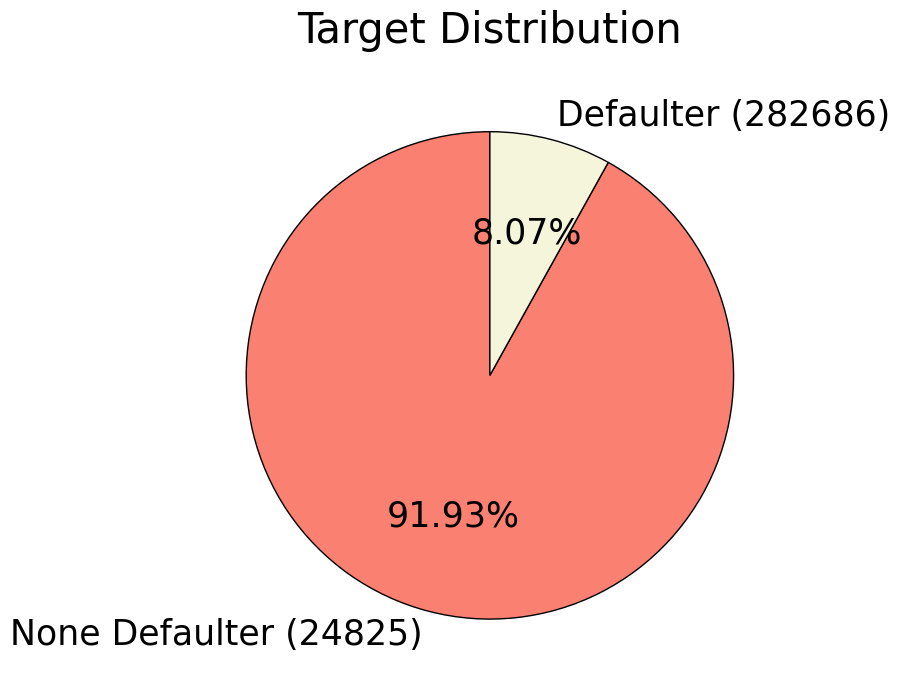

In [11]:
data = app_train[target].value_counts()
colors = [color_8, color_9]
labels = [f'Non-Defaulter ({data[1]})', f'Defaulter ({data[0]})']
title = "Target Distribution"

functions.piechart(data, title, colors, labels, size)

## **EXT_SOURCE 1, EXT_SOURCE 2, EXT_SOURCE 3

In [ ]:
for ext_col in ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1']:
            #X_model - datapoints which do not have missing values of given column
            #Y_train - values of column trying to predict with non missing values
            #X_train_missing - datapoints in application_train with missing values
            #X_test_missing - datapoints in application_test with missing values
            X_model, X_train_missing, X_test_missing, Y_train = self.application_train[~self.application_train[ext_col].isna()][columns_for_modelling], self.application_train[
                                                                self.application_train[ext_col].isna()][columns_for_modelling], self.application_test[
                                                                self.application_test[ext_col].isna()][columns_for_modelling], self.application_train[
                                                                ext_col][~self.application_train[ext_col].isna()]
            xg = XGBRegressor(n_estimators = 1000, max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 59)
            xg.fit(X_model, Y_train)
            #dumping the model to pickle file
            with open(f'nan_{ext_col}_xgbr_model.pkl', 'wb') as f:
                pickle.dump(xg, f)

            self.application_train[ext_col][self.application_train[ext_col].isna()] = xg.predict(X_train_missing)
            self.application_test[ext_col][self.application_test[ext_col].isna()] = xg.predict(X_test_missing)
            
            #adding the predicted column to columns for modelling for next column's prediction
            columns_for_modelling = columns_for_modelling + [ext_col]

# **Anamolies**

## **Days Birth**

In [20]:
(app_train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [32]:
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_test["DAYS_BIRTH"] = abs(app_test["DAYS_BIRTH"])

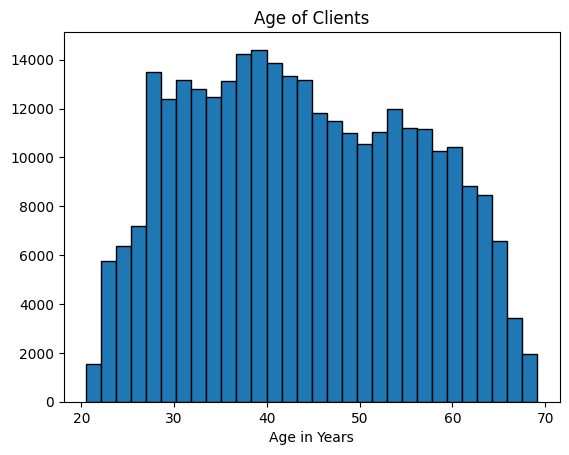

In [36]:
plt.hist(app_train['DAYS_BIRTH']/365, bins=30, edgecolor = 'k')
plt.title('Age of Clients');
plt.xlabel('Age in Years');

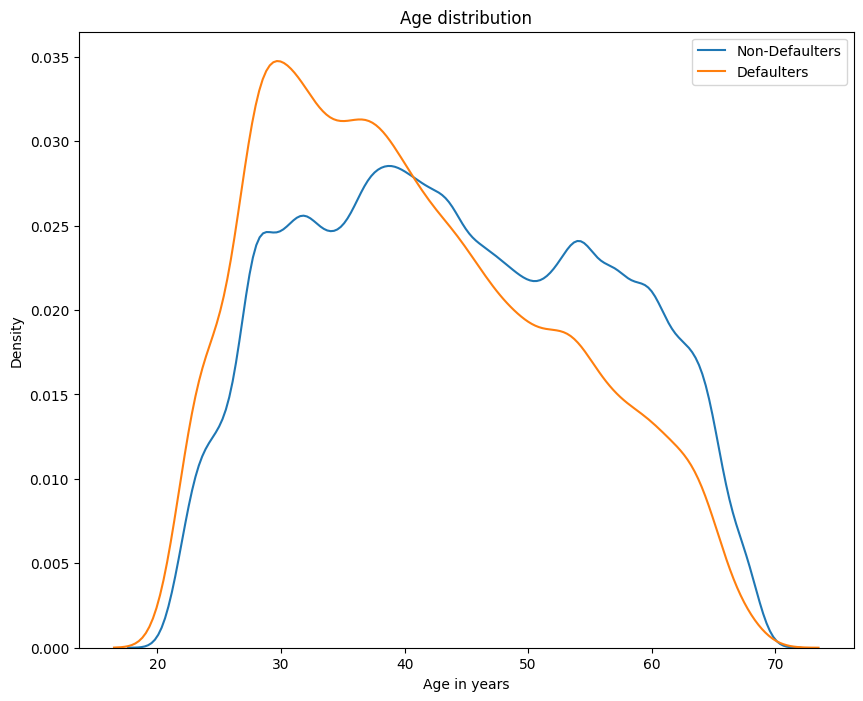

In [40]:
plt.figure(figsize=(10,8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365, label='Non-Defaulters')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH']/365, label='Defaulters')

plt.title('Age distribution');
plt.xlabel('Age in years');
plt.ylabel('Density');
plt.legend();

## **Days Employed**

In [24]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [26]:
app_train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

# **Cars**

In [49]:
tempY=app_train[app_train.FLAG_OWN_CAR=='Y']
tempN=app_train[app_train.FLAG_OWN_CAR=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [50]:
print('People count who owns a car:',len(tempY),'(',round(len(tempY)/len(app_train.index)*100,2),'%)')
print('People count who DOES NOT own a car:',len(tempN),'(',round(len(tempN)/len(app_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with cars):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no cars):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who owns a car: 104587 ( 34.01 %)
People count who DOES NOT own a car: 202924 ( 65.99 %)
Percentage of people who defaulted (with cars): 7.24 %
Percentage of people who defaulted (no cars): 8.5 %


# **Realty**

In [51]:
tempY=app_train[app_train.FLAG_OWN_REALTY=='Y']
tempN=app_train[app_train.FLAG_OWN_REALTY=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

In [52]:
print('People count who owns realty:',len(tempY),'(',round(len(tempY)/len(app_train.index)*100,2),'%)')
print('People count who DOES NOT own realty:',len(tempN),'(',round(len(tempN)/len(app_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with realty):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no realty):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

People count who owns realty: 213312 ( 69.37 %)
People count who DOES NOT own realty: 94199 ( 30.63 %)
Percentage of people who defaulted (with realty): 7.96 %
Percentage of people who defaulted (no realty): 8.32 %
